In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from pathlib import Path

In [12]:
data = Path(r'C:/Users/Mailson/Desktop/Computação/Visualização de dados/dados/CompanhiaMB.csv')

In [17]:
df = pd.read_csv(data)
df

,funcionario,estado_civil,instrucao,nfilhos,salario,idade_anos,idade_meses,regiao
0,1,solteiro,ensino_fundamental,NaN,4.00,26,3,interior
1,2,casado,ensino_fundamental,1.0,4.56,32,10,capital
2,3,casado,ensino_fundamental,2.0,5.25,36,5,capital
3,4,solteiro,ensino_medio,NaN,5.73,20,10,outro
4,5,solteiro,ensino_fundamental,NaN,6.26,40,7,outro
5,6,casado,ensino_fundamental,0.0,6.66,28,0,interior
6,7,solteiro,ensino_fundamental,NaN,6.86,41,0,interior
7,8,solteiro,ensino_fundamental,NaN,7.39,43,4,capital
8,9,casado,ensino_medio,1.0,7.59,34,10,capital
9,10,solteiro,ensino_medio,NaN,7.44,23,6,outro


Vamos calcular algumas medidas descritivas para cada valor qualitativo. Primeiro via dataframe, mas vamos optar via series que ja monta um array desejado

In [30]:
df[['salario', 'instrucao']].groupby('instrucao').mean().values

array([[ 7.83666667],
       [11.52833333],
       [16.475     ]])

In [90]:
medias = df.groupby('instrucao')['salario'].mean().values
medias

array([ 7.83666667, 11.52833333, 16.475     ])

In [32]:
std = df.groupby('instrucao')['salario'].std().values
std

array([2.9564639 , 3.71514429, 4.50243823])

In [35]:
var = df.groupby('instrucao')['salario'].var().values
var

array([ 8.74067879, 13.80229706, 20.27195   ])

Para estatísticas gerais

In [43]:
df.groupby('instrucao')['salario'].describe()

,count,mean,std,min,25%,50%,75%,max
instrucao,,,,,,,,
ensino_fundamental,12.0,7.836667,2.956464,4.00,6.0075,7.125,9.1625,13.85
ensino_medio,18.0,11.528333,3.715144,5.73,8.8375,10.910,14.4175,19.40
superior,6.0,16.475000,4.502438,10.53,13.6475,16.740,18.3775,23.30


Vemos aqui que o mínimo,os quartis, o maximo, media e mediana aumentam quando aumentamos o grau de instrução. Isso nos mostra que pode haver associação entre essas variaveis.

In [65]:
freq = pd.crosstab(df.instrucao, columns='count').values.ravel()
freq

array([12, 18,  6], dtype=int64)

In [66]:
s2barra = np.average(var,weights = freq)
s2barra

13.193366458704695

In [79]:
s2 = df.salario.var()
s2

21.044766349206352

Com esses valores calculamos o $R^2$

In [80]:
r2 = (s2 - s2barra)/s2
r2

0.37308087722236705

Temos então que o $R^2 = 37\%$, ou seja, o que indica que há algum tipo de associação.

<Axes: xlabel='instrucao', ylabel='salario'>

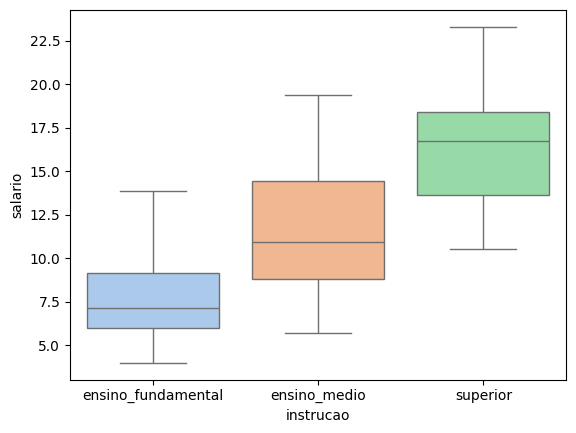

In [86]:
sns.boxplot(y = df.salario, x = df.instrucao, hue = df.instrucao, palette = 'pastel' )

<Axes: xlabel='instrucao', ylabel='salario'>

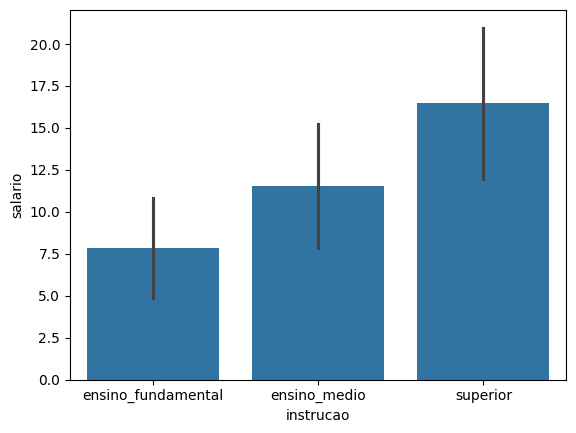

In [88]:
sns.barplot(df, x="instrucao", y="salario", errorbar="sd")

<Axes: xlabel='instrucao', ylabel='salario'>

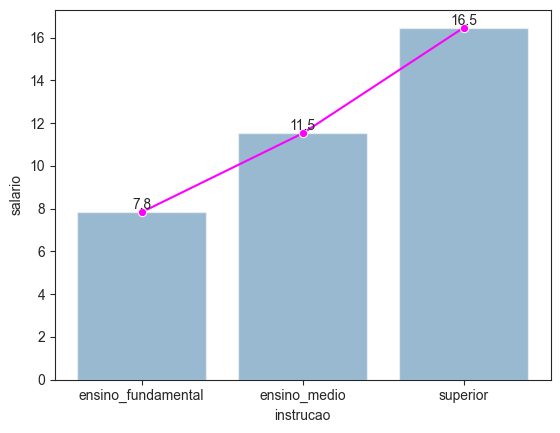

In [208]:
import matplotlib.pyplot as plt
sns.set_style('ticks')
ax = sns.barplot(df.groupby('instrucao')['salario'].mean(), alpha = 0.5)
ax.bar_label(ax.containers[0], fmt='%.1f')
xticks = ax.get_xticks()
y = [ax.containers[0][i].get_height() for i in range(len(ax.containers[0].get_children()))]
# wsa not necessary x = [ax.containers[0][i].get_center()[1] for i in range(len(ax.containers[0].get_children()))]
sns.lineplot(x = xticks, y = y, color= 'magenta', marker = 'o', ax=ax)

<Axes: xlabel='regiao', ylabel='salario'>

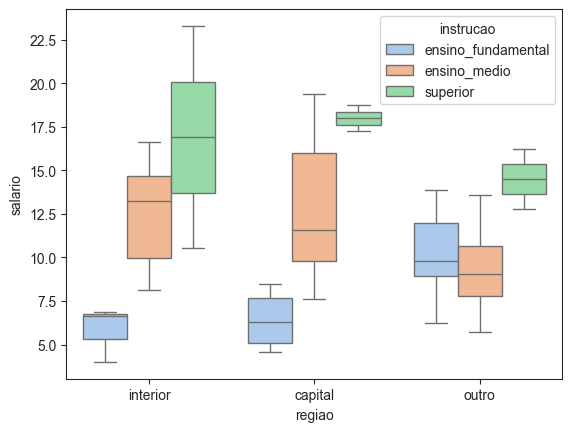

In [209]:
sns.boxplot(y = df.salario, x = df.regiao, hue = df.instrucao, palette = 'pastel' )

<Axes: xlabel='instrucao', ylabel='salario'>

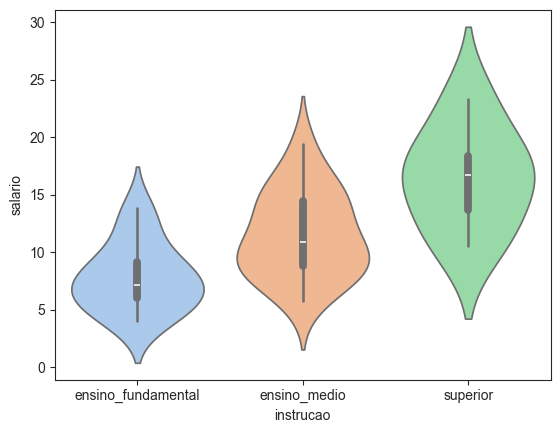

In [214]:
sns.violinplot(y = df.salario, x = df.instrucao, hue = df.instrucao, palette = 'pastel')

<Axes: xlabel='regiao', ylabel='salario'>

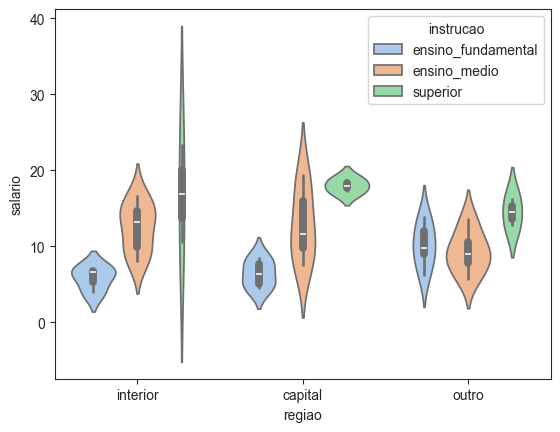

In [215]:
sns.violinplot(y = df.salario, x = df.regiao, hue = df.instrucao, palette = 'pastel')